## Credit Card Fraud Detection



### Dataset

The dataset used for this research is collected from Kaggle at [Link](https://www.kaggle.com/mlg-ulb/creditcardfraud). It consists of 284,807 transactions that occurred in 2 days, of which 492 are labelled as Fraud. This means that the dataset is highly unbalanced with only 0.172% accounting for the Fraud transactions. It consists of 31 features of which 28 (V1-V28) are the result of PCA transformation, due to confidentiality issues. The remaining features that are not transformed are ‘Time’ and ‘Amount’, which represent the seconds elapsed between each transaction and the first transaction in the dataset and, the transaction amount respectively. The ‘Class’ feature represents the label of the transaction with ‘1’ for a Fraud transaction and ‘0’ for a ‘Valid’ transaction.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Understanding

The Dataset we use is the Kaggle Credit Card Fraud Detection Dataset enlisted in the following link: Link

- The Data has 32 features from V1-V28 which are unknown for confidentiality, Time, Amount and Class
- The input features are V1-V28, Time and Amount
- The target variable is Class
- The Data does not have any missing values as evident from the below mentioned code, thus need not be handled
- The Data consists of all numerical features, and only the Target Variable Class is a categorical feature.

      1. Class 0: Legitimate Transaction
      2. Class 1: Fraud Transaction

In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### To Determine the Number of Fraudulent Cases 

In [8]:
fraud=df[df['Class']==1]
valid=df[df['Class']==0]
OutlierFraction=len(fraud)/float(len(valid))
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))
print("Number of fraud cases as compared to valid cases:", OutlierFraction)

Fraud Cases: 492
Valid Cases: 284315
Number of fraud cases as compared to valid cases: 0.0017304750013189597


The outlier fraction (OutlierFraction) is the ratio of fraudulent cases to valid (non-fraudulent) cases. If the OutlierFraction is less than 1, it means that there are more valid cases than fraudulent cases in the dataset.

Generally in fraud detection or anomaly detection scenarios, it's common to have a highly imbalanced dataset, where the majority of cases are non-fraudulent, and only a small fraction represents fraudulent activities. In such cases, the outlier fraction can help quantify the class imbalance.

#### Visualize the distribution of Class 

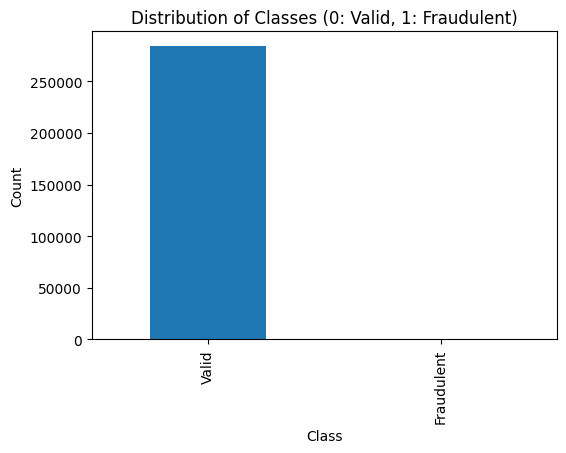

In [9]:
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes (0: Valid, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1], ['Valid','Fraudulent'])
plt.show()

- Only 492 (0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class

- The Dataset is highly imbalanced as evident from the countplot with majority class label '0' and minority class label '1'

### Relationship of Fraud Transactions with Amount

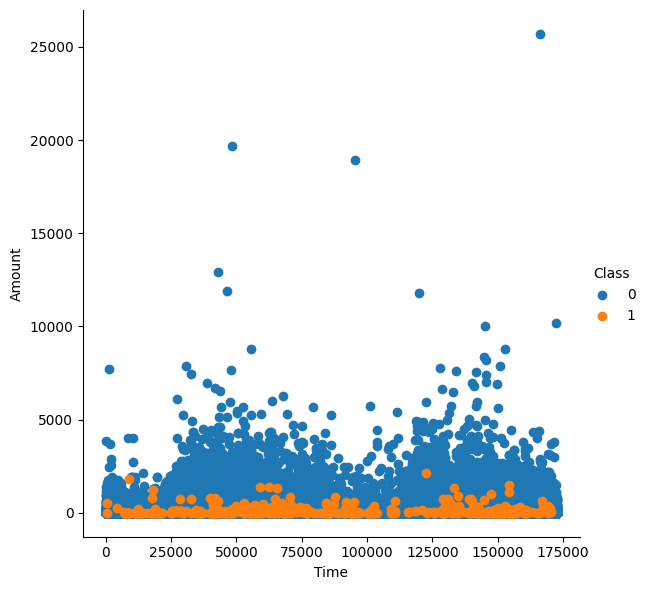

In [10]:
sns.FacetGrid(df, hue='Class', height=6).map(plt.scatter, 'Time', 'Amount').add_legend()

From the plot we can observe that the fraud transactions are generally not above an amount of 2500 and also observed that the fraud transactions are evenly distributed about time.

Create a scatter plot to observe the distribution of classes with time seconds in a day = 60 x 60 x 24 = 86400 i.e in 2 days = 172800
highest value in the time column = 172792
since the data is from just 2 days, we can conclude that the data is from 00:00:00 on day 1 to 11:59:59 on day 2
so doing a modulo of the time value by 86400 gives us the seconds elapsed from 00:00 in each day using which we can create bins

In [11]:
df2 = pd.DataFrame(df)

# Add new columns to df2
df2['seconds_from_12_am'] = df2['Time'] % 86400
bins = [-1, 14400, 28800, 43200, 57600, 72000, 86401]
labels = ['midnight to 4am', '4am to 8am', '8am to noon', 'noon to 4pm', '4pm to 8pm', '8pm to midnight']
df2['Time_Slot'] = pd.cut(df2['seconds_from_12_am'], bins, labels=labels)

# Display df2
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,seconds_from_12_am,Time_Slot
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,midnight to 4am
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,midnight to 4am
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,midnight to 4am
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,midnight to 4am
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2.0,midnight to 4am


In [12]:
series_counts = df2.groupby('Class')['Time_Slot'].value_counts().rename('count')
df2_counts = pd.DataFrame(series_counts)
df2_counts = df2_counts.reset_index()
df2_counts

,Class,Time_Slot,count
0,0,4pm to 8pm,65205
1,0,noon to 4pm,63729
2,0,8pm to midnight,60771
3,0,8am to noon,59487
4,0,midnight to 4am,18647
5,0,4am to 8am,16476
6,1,4pm to 8pm,103
7,1,midnight to 4am,90
8,1,8am to noon,86
9,1,noon to 4pm,83


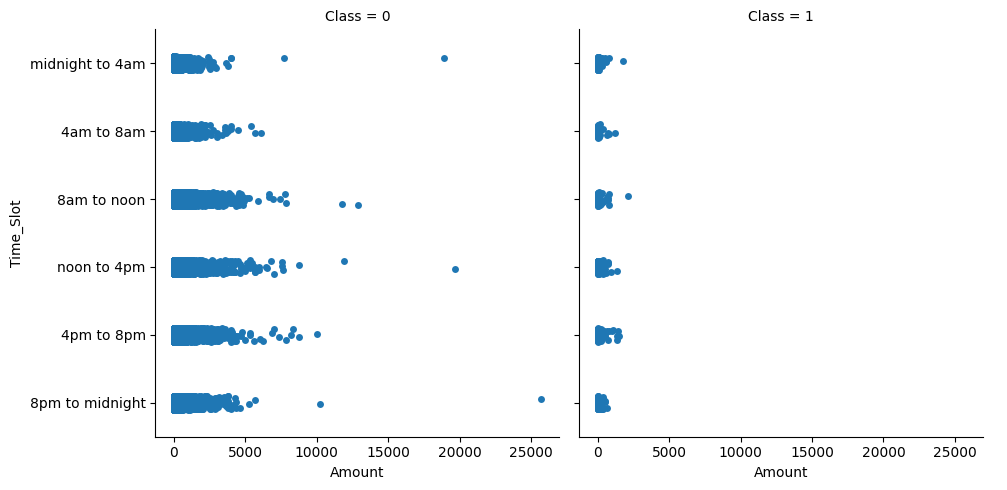

<Figure size 800x1600 with 0 Axes>

In [13]:
sns.catplot(x='Amount', y='Time_Slot', data=df2, col='Class')
plt.figure(figsize = (8,16))
plt.show()

## Data Preparation

In [14]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (284315, 33)
Shape of fraud :  (492, 33)


In [15]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))
     

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,seconds_from_12_am,Time_Slot
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,midnight to 4am
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,midnight to 4am
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,midnight to 4am
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,midnight to 4am
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2.0,midnight to 4am


In [17]:
columns_to_drop = ['Time_Slot', 'seconds_from_12_am']
df = df.drop(columns=columns_to_drop)

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

In [22]:
mean_values = np.mean(X, axis=0)
std_dev_values = np.std(X, axis=0)

scaled_X = (X - mean_values) / std_dev_values

df_scaled_X = pd.DataFrame(data=scaled_X, columns=[f'feature_{i}' for i in range(scaled_X.shape[1])])
print(f"Scaled_X shape: {df_scaled_X.shape}")

Scaled_X shape: (284807, 30)


In [24]:
import numpy as np
import pandas as pd


np.random.seed(42)


df = pd.DataFrame(data=np.column_stack((scaled_X, y)), columns=[f'feature_{i}' for i in range(scaled_X.shape[1])] + ['label'])

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

split_index = int(len(df_shuffled) * 0.67)

train_data, test_data = df_shuffled.iloc[:split_index], df_shuffled.iloc[split_index:]

X_train, y_train = train_data.iloc[:, :-1].values, train_data['label'].values
X_test, y_test = test_data.iloc[:, :-1].values, test_data['label'].values

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (190820, 30), y_train shape: (190820,)
X_test shape: (93987, 30), y_test shape: (93987,)


## Data Sampling

### Adaptive Synthetic Sampling

In [29]:
import numpy as np
import pandas as pd
from collections import Counter

X_res = X_train  

df_original = pd.DataFrame(data=X_res, columns=[f'feature_{i}' for i in range(X_res.shape[1])])
df_original['Class'] = y_train

print('Original dataset shape {}'.format(Counter(df_original['Class'])))
minority_class = df_original[df_original['Class'] == 1]
majority_class = df_original[df_original['Class'] == 0]
desired_samples = min(len(minority_class), len(majority_class))
minority_features = minority_class.drop('Class', axis=1).values
minority_labels = minority_class['Class'].values
np.random.seed(42)
n_neighbors = 15
distances = np.linalg.norm(minority_features[:, np.newaxis, :] - minority_features, axis=2)
indices = np.argsort(distances, axis=1)[:, 1:(1 + n_neighbors)]

synthetic_samples = []
for i, indices_row in enumerate(indices):
    for j in indices_row:
        alpha = np.random.rand()
        synthetic_sample = minority_features[i] + alpha * (minority_features[j] - minority_features[i])
        synthetic_samples.append(synthetic_sample)

df_synthetic = pd.DataFrame(data=np.vstack(synthetic_samples), columns=df_original.columns[:-1])
df_synthetic['Class'] = 1  # Set the label to 1 for synthetic samples

df_resampled = pd.concat([majority_class.head(desired_samples), df_synthetic], ignore_index=True)

print('Resampled and balanced dataset shape {}'.format(Counter(df_resampled['Class'])))


Resampled and balanced dataset shape Counter({1: 2535, 0: 493})


### Logistic Regresssion 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Placeholder for resampling logic (replace this with your actual resampling method)
# X_res, y_res = perform_resampling(X_train, y_train)

# Creating a placeholder for demonstration purposes
# Replace this with your actual resampling method
X_res = np.random.rand(100, 30)  # Assuming 30 features
y_res = np.random.randint(0, 2, 100)

# Create a DataFrame using pandas
df_resampled = pd.DataFrame(data=X_res, columns=[f'feature_{i}' for i in range(X_res.shape[1])])
df_resampled['Class'] = y_res

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize coefficients and bias
np.random.seed(42)
weights = np.random.rand(X_res.shape[1])
bias = 0

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Perform gradient descent
for epoch in range(epochs):
    # Compute predicted values
    z = np.dot(X_res, weights) + bias
    predictions = sigmoid(z)

    # Compute gradients
    dz = predictions - y_res
    dw = 1/len(y_res) * np.dot(X_res.T, dz)
    db = np.sum(dz)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

# Assuming X_test has 30 features
weights = np.random.rand(X_test.shape[1])

# Make predictions on the test set
predictions_test = sigmoid(np.dot(X_test, weights) + bias)
y_pred_log_over = np.round(predictions_test)

# Confusion Matrix
conf_matrix = np.array([[np.sum((y_test == 0) & (y_pred_log_over == 0)), np.sum((y_test == 0) & (y_pred_log_over == 1))],
                        [np.sum((y_test == 1) & (y_pred_log_over == 0)), np.sum((y_test == 1) & (y_pred_log_over == 1))]])
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
print(f"Precision: {precision:.4f}")

# Recall
recall = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1:.4f}")



Confusion Matrix:
[[91446  2373]
 [  165     3]]
Accuracy: 0.9730
Precision: 0.0013
Recall: 0.0179
F1 Score: 0.0024
